In [8]:
# mediapipe人工智能工具包
import mediapipe as mp
# opencv-python
import cv2
# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

In [9]:
# import solution
mp_pose = mp.solutions.pose
# drawing_utils
mp_drawing = mp.solutions.drawing_utils
# guide the model
pose = mp_pose.Pose(static_image_mode=True,         # static image or video
                    model_complexity=2,             # choose the complexity of model [0,2]
                    smooth_landmarks=True,          # Whether to smooth key points
                    enable_segmentation=True,      # Is the human body keying
                    min_detection_confidence=0.5,   # Confidence threshold
                    min_tracking_confidence=0.5)    # tracking confidence threshold


In [10]:
# BGR(cv2) -> RGB(plt)
def show_image(img):
    img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

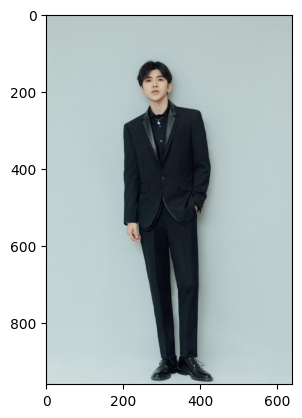

In [11]:
img = cv2.imread('../datasets/example/kun.png')
show_image(img)

In [12]:
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
results = pose.process(img_RGB)

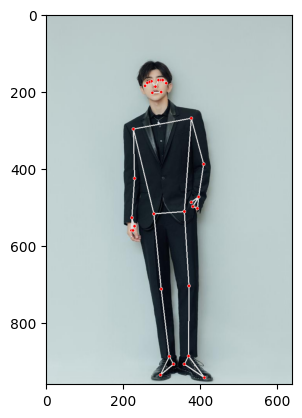

In [13]:
mp_drawing.draw_landmarks(img,results.pose_landmarks,mp_pose.POSE_CONNECTIONS)
show_image(img)

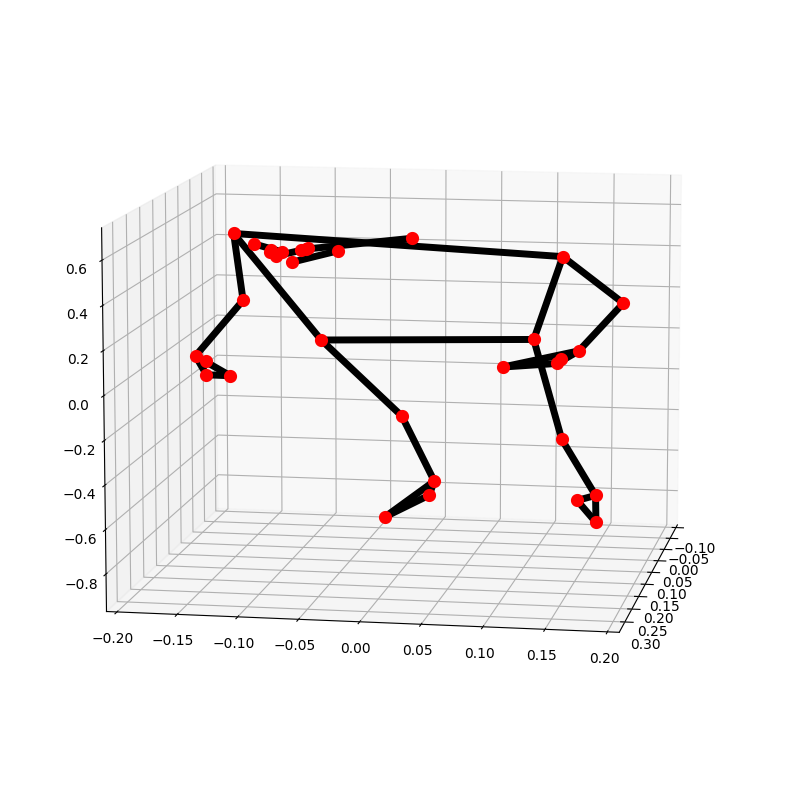

In [14]:
# Visualization of inspection results in meters in a 3D real physical coordinate system
mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)